## Exercises

#### 1. Load Credit Risk dataset

In [1]:
credit_data <- read.csv("credit.data.manage.csv", sep=",", stringsAsFactors=TRUE)

In [2]:
summary(credit_data)

      No.             Age             Sex           Job        Housing   
 Min.   :  0.0   Min.   :-58.00   female:310   Min.   :0.000   free:108  
 1st Qu.:249.8   1st Qu.: 24.00   male  :690   1st Qu.:2.000   own :713  
 Median :499.5   Median : 31.00                Median :2.000   rent:179  
 Mean   :499.5   Mean   : 26.79                Mean   :1.904             
 3rd Qu.:749.2   3rd Qu.: 40.00                3rd Qu.:2.000             
 Max.   :999.0   Max.   : 75.00                Max.   :3.000             
                                                                         
 Credit.amount       Duration                   Purpose   
 Min.   :-15672   Min.   : 4.0   car                :337  
 1st Qu.:  1273   1st Qu.:12.0   radio/TV           :280  
 Median :  2184   Median :18.0   furniture/equipment:181  
 Mean   :  2861   Mean   :20.9   business           : 97  
 3rd Qu.:  3869   3rd Qu.:24.0   education          : 59  
 Max.   : 18424   Max.   :72.0   repairs            : 

In [3]:
head(credit_data)

No.,Age,Sex,Job,Housing,Credit.amount,Duration,Purpose
0,67,male,2,own,1169,6,radio/TV
1,22,female,2,own,5951,48,radio/TV
2,49,male,1,own,2096,12,education
3,45,male,2,free,7882,42,furniture/equipment
4,53,male,2,free,4870,24,car
5,35,male,1,free,9055,36,education


<p>
    <b>2. Replace negative values in Age column with median age.</b>
</p>

In [4]:
# calculate how many values column Age has
dim(credit_data["Age"])

[1] 1000    1

In [5]:
# calculate the number of negative values in Age column
sum(credit_data["Age"] < 0)

[1] 116

So, there are 116 negatiove values in the `Age` column

In [6]:
# calculate median age 
median_age = median(credit_data[,2])
median_age

[1] 31

In [7]:
# import dplyr package to use %>%
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [8]:
# replace the negative values in the Age column with it's median
credit_data <- credit_data %>%
    mutate(Age = ifelse(Age < 0, median_age, Age))

In [9]:
# count the negative values again
sum(credit_data["Age"] < 0)

[1] 0

<p>
    <b>3. Using IQR rule and empirical rule with −2.5𝜎 and 2.5𝜎, determine the valid range of Credit.amount column. Use only positive values when determining the valid range</b>
</p>



## determine outlier using IQR

In [10]:
# defining and calculating the 1st quartile q1
q1 <- quantile(credit_data$Credit.amount, 0.25)

# defining and calculating the 3rd quartile q3
q3 <- quantile(credit_data$Credit.amount, 0.75)
q3

75% 
3869

In [79]:
iqr_rule <- function(q1, q3){
    #calculate iqr and bound limits
    iqr <<- (q3 - q1)
    low_bound <<- (q1 - (1.5*iqr))
    up_bound <<- (q3 + (1.5*iqr))

    #printing    
    cat("iqr:", iqr,
     "\nlower bound:", low_bound,
     "\nupper bound:", up_bound)
}

In [12]:
iqr_rule(q1, q3)

In [13]:
cat("iqr:", iqr,
     "\nlower bound:", low_bound,
     "\nupper bound:", up_bound)

iqr: 2595.75 
lower bound: -2620.375 
upper bound: 7762.625

For IQR rule, the valid range for `Credit.amount` is between 0 and the upper bound (7762.625) 

In [14]:
# calculate how many data points are below the lower bound 
# and above the upper bound

sum(credit_data["Credit.amount"] < low_bound)
sum(credit_data["Credit.amount"] > up_bound)

[1] 24

[1] 72

<mark>Now we know that there are `24` and `72` data points which are respectively below and above the bound limit set by the IQR rule. So, that makes it `96` data points that are considered as outliers</mark>

In [15]:
library(ggplot2)
library(MASS)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'MASS' was built under R version 3.6.3"
Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [16]:
install.packages("MASS")

Installing package into 'C:/Users/ramdh/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'MASS' is in use and will not be installed"

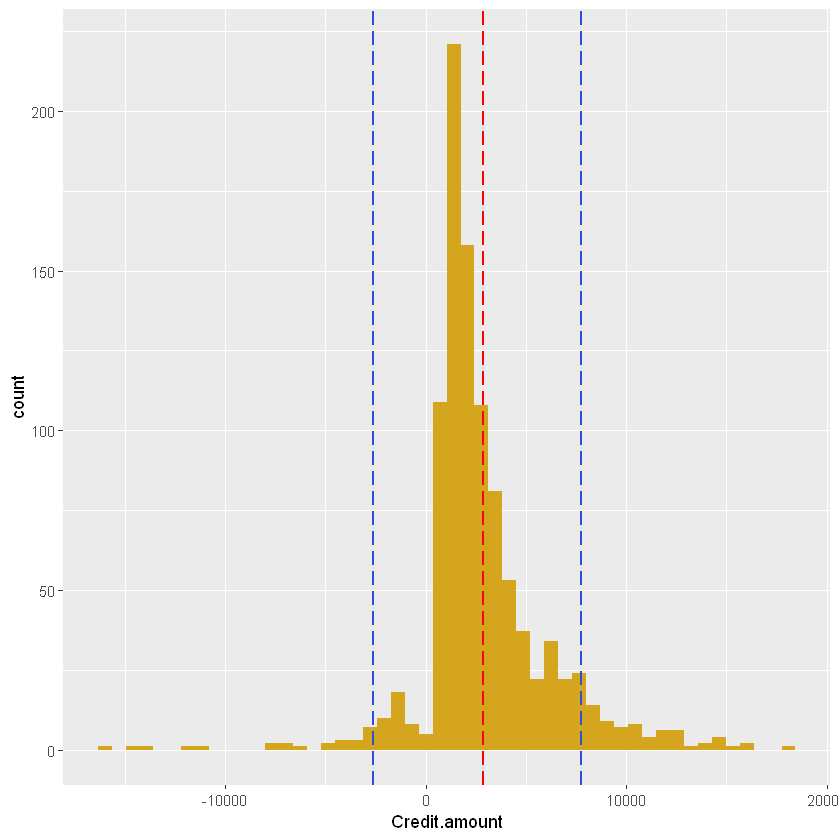

In [127]:
 # plot the distribution of Credit.amount
ggplot(credit_data, aes(x = Credit.amount)) +
    geom_histogram(alpha = 1, bins = 50, fill = "#d6a51e") +
    geom_vline(aes(xintercept = mean(Credit.amount, na.rm = FALSE)), 
               colour = "red", linetype = "longdash", size = .8) +
    geom_vline(aes(xintercept = low_bound),
               colour = "#2c4fdb", linetype = "longdash", size = .8) +
    geom_vline(aes(xintercept = up_bound),
                colour = "#2c4fdb", linetype = "longdash", size = .8)

## determine outlier by using empirical rule (Chebyshev's Theorem)

Chebychshev's Theorem: For any number $k$ greater than 1, at least $1-(\frac{1}{k^2})$ of the data values lie within $k$ standard deviation of the mean

In this case, the $k$ is set as ($k=2.5$). Thus, the range of value becomes:

$$(\mu-2.5\sigma)<\mu < (\mu+2.5\sigma)$$

In addition, for the context of credit amount, the valid and meaningful value should be positive integer. The negative value could indicates debts thus omitted for the range of valid credit amount values.

Therefore, the range of our valid credit amount adhering to the empirical rule becomes:

$$0 < \ Credit.amount_{valid} \ < (\mu+2.5\sigma)$$


In [43]:
# define a function to calculate limits set by the emprical rule
empirical_rule <- function(k, mean, stdev){
    #calculate lower and upper limit
    empirical_up_limit <<- (mean+(k*stdev))
    empirical_low_limit <<- (mean-(k*stdev))
    
    #print
    cat("Lower limit:", empirical_low_limit,
        "\nUpper limit:", empirical_up_limit)
}

In [44]:
# calculate range limits using k=2.5
empirical_rule(2.5, mean(credit_data[,6]), sd(credit_data[,6]))

Lower limit: -5234.512 
Upper limit: 10956.56

Thus, the valid range for the `Credit.amount` column is:

$$ $0 \ < \ Credit.amount_{valid} \ < \ $10957$$

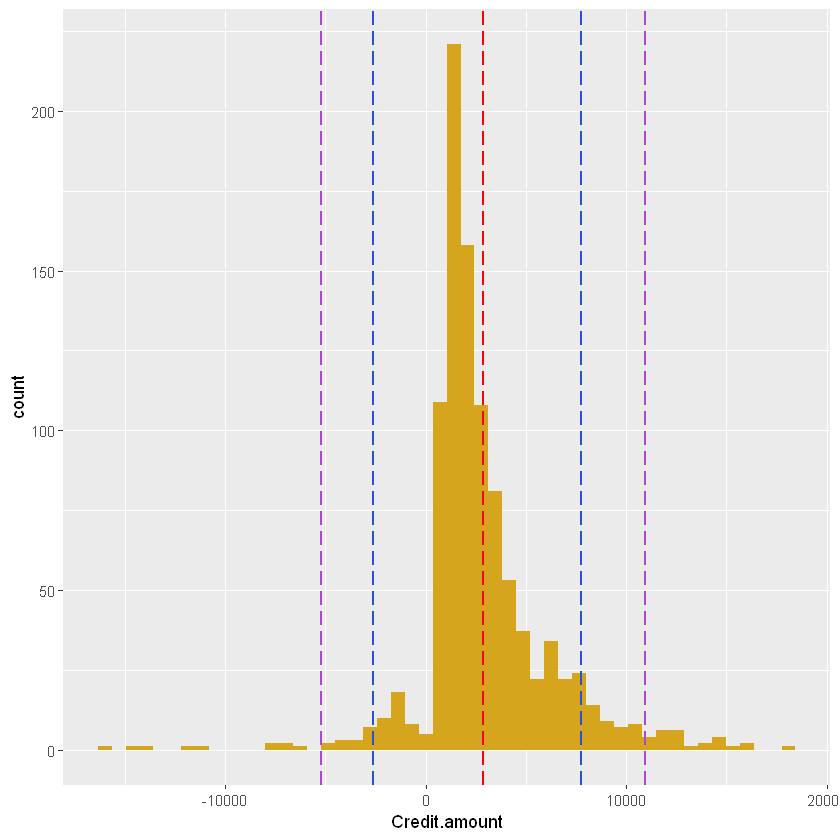

In [53]:
 # plot the distribution of Credit.amount
ggplot(credit_data, aes(x = Credit.amount)) +
    geom_histogram(alpha = 1, bins = 50, fill = "#d6a51e") +
    geom_vline(aes(xintercept = mean(Credit.amount, na.rm = FALSE)), 
               colour = "red", linetype = "longdash", size = .8) +
    geom_vline(aes(xintercept = low_bound),
               colour = "#2c4fdb", linetype = "longdash", size = .8) +
    geom_vline(aes(xintercept = up_bound),
                colour = "#2c4fdb", linetype = "longdash", size = .8) +
    geom_vline(aes(xintercept = empirical_up_limit),
                colour = "#a949cc", linetype = "longdash", size = .8) +
    geom_vline(aes(xintercept = empirical_low_limit),
                colour = "#a949cc", linetype = "longdash", size = .8) 

#### interesting finding:
   - the empirical rule seems a better measure to use for this particular dataset. When assessing the lower limit set by both empirical and IQR rule, the values between the purple and blue line doesn't really looks like an outlier visually. However, the IQR rule here omits those values.
  

#### 4. Explain what to be done with the outliers in Credit.amount column

- The outliers should be dropped before this dataset being used for modeling 

#### 5. Replace negative values in Credit.amount column with median value


In [54]:
# calculate the number of negative values in Credit.amount column
sum(credit_data["Credit.amount"] < 0)

[1] 61

In [64]:
cat("Percentage of negative values in Credit.amount:", 
    (sum(credit_data["Credit.amount"]<0))/
    (nrow(credit_data["Credit.amount"]))*100, "%")

Percentage of negative values in Credit.amount: 6.1 %

In [65]:
# calculate the median valeue for Credit.amount
median_cred_amount = median(credit_data[,6])
median_cred_amount

[1] 2183.5

In [66]:
# replace the negative values in the Credit.amount column with it's median
credit_data <- credit_data %>%
    mutate(Credit.amount = ifelse(Credit.amount < 0, median_cred_amount, Credit.amount))

In [67]:
# calculate the number of negative values in Credit.amount column again
sum(credit_data["Credit.amount"] < 0)

[1] 0

In [76]:
# recalculate some parameters after replacing negative values

# defining and calculating the updated 1st quartile 
q1_new <- quantile(credit_data$Credit.amount, 0.25)

# defining and calculating the updated 3rd quartile 
q3_new <- quantile(credit_data$Credit.amount, 0.75)



In [81]:
# recalculate mean and limits after replacing negative values
empirical_rule(2.5, mean(credit_data[,6]), sd(credit_data[,6]))

Lower limit: -3549.521 
Upper limit: 9948.19

In [82]:
iqr_rule(q1_new, q3_new)

iqr: 2461.5 
lower bound: -2284.75 
upper bound: 7561.25

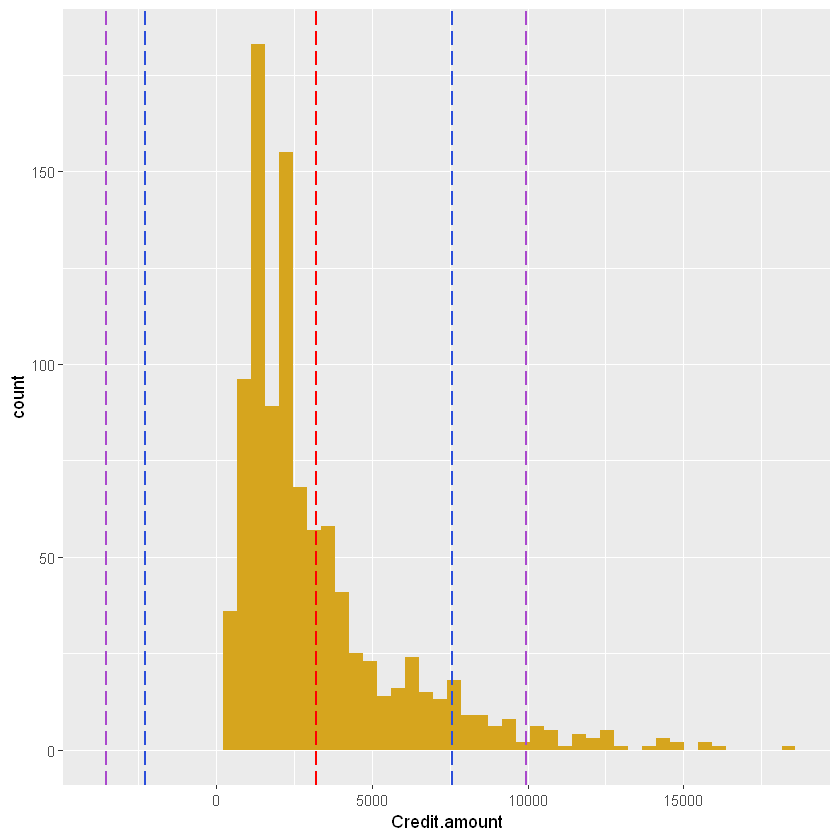

In [88]:
# plot the distribution of Credit.amount after updating
ggplot(credit_data, aes(x = Credit.amount)) +
    geom_histogram(alpha = 1, bins = 50, fill = "#d6a51e") +
    geom_vline(aes(xintercept = mean(Credit.amount, na.rm = FALSE)), 
               colour = "red", linetype = "longdash", size = .8) +
    geom_vline(aes(xintercept = low_bound),
               colour = "#2c4fdb", linetype = "longdash", size = .8) +
    geom_vline(aes(xintercept = up_bound),
                colour = "#2c4fdb", linetype = "longdash", size = .8) +
    geom_vline(aes(xintercept = empirical_up_limit),
                colour = "#a949cc", linetype = "longdash", size = .8) +
    geom_vline(aes(xintercept = empirical_low_limit),
                colour = "#a949cc", linetype = "longdash", size = .8) 

**The bound limits also changed!**

#### 5. Derive a new attribute called Credit amount per duration attribute.

In [70]:
head(credit_data[,6])

[1] 1169 5951 2096 7882 4870 9055

In [74]:
unique(credit_data[,7])

[1]  6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4 47
[26] 13 22 39 28  5 26 72 40

In [84]:
# defining credit amount per duration attribute

credit_data$credit_per_duration <- credit_data[,6]/credit_data[,7]

In [85]:
head(credit_data)

No.,Age,Sex,Job,Housing,Credit.amount,Duration,Purpose,credit_per_duration
0,67,male,2,own,1169,6,radio/TV,194.8333
1,22,female,2,own,5951,48,radio/TV,123.9792
2,49,male,1,own,2096,12,education,174.6667
3,45,male,2,free,7882,42,furniture/equipment,187.6667
4,53,male,2,free,4870,24,car,202.9167
5,35,male,1,free,9055,36,education,251.5278
